In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#loading the csv data to pandas dataframe
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [3]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [5]:
#getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#checking the missung value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting statistical mesures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation= gold_data.corr()

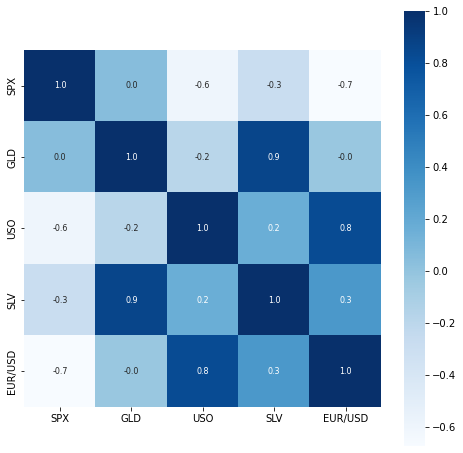

In [10]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True ,square=True ,fmt='.1f', annot=True ,annot_kws={'size':8},cmap='Blues')

In [11]:
#correlation values of GLD
print(correlation ['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


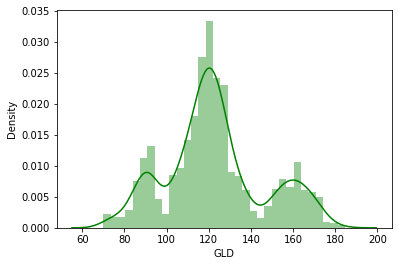

In [12]:
#checking ditribution of the gold price 
sns.distplot(gold_data['GLD'],color='green')

In [13]:

X = gold_data.drop(['Date','GLD'],axis =1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
X_train ,X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [17]:
regression= RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regression.fit(X_train ,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
#prediction on Test data
test_data_prediction =regression.predict(X_test)


In [20]:
print(test_data_prediction)

[168.42979897  82.15159982 115.7986003  127.64260091 120.85450108
 154.68829768 150.56409891 126.03890068 117.46239861 126.03760062
 116.85320121 172.26670119 141.41899919 168.14569879 115.02260033
 117.9055006  136.25720337 170.0495014  159.80300346 156.0218999
 155.16890034 124.74629989 176.86539942 157.72060352 125.14990058
  93.6414996   77.45040015 121.00140038 119.031399   167.45809937
  88.18370089 125.39270024  91.1818009  117.66970016 121.06889892
 136.79980093 115.29810113 115.15520055 145.51609935 107.2274011
 104.29500264  87.13029776 126.47940067 117.99950008 153.31259892
 119.61939972 108.54580023 108.08089842  93.31890073 127.05289773
  75.28120011 113.67889935 121.53120031 111.33589941 118.92209884
 120.73429937 159.15619942 168.30240127 146.86629666  85.96659877
  94.21090012  86.88889881  90.53020023 118.95340071 126.43610075
 127.61799979 170.06460017 122.30919944 117.45069896  98.85550025
 168.77550215 142.87879858 131.71150229 121.0472022  120.00979996
 119.7637006

In [22]:

Y_test =list(Y_test)

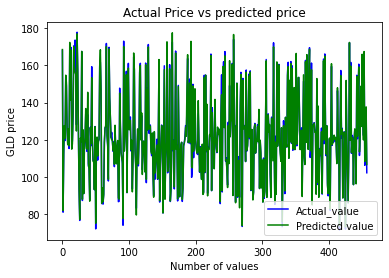

In [24]:
plt.plot(Y_test ,color='blue',label='Actual_value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual Price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [21]:
#R suqared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:' ,error_score)

R squared error: 0.989543567594718
